### Training the Recommender System with Outliers (as in the Dataset)

#### Approach: Content Based Filtering: Use of features directly related to the products.
#### Model Used: NearestNeighbour


Features Used:
- BrandName 
- Category
- Individual_category 
- DiscountPrice
- OriginalPrice
- DiscountOffer

Remarks: 
1. All categorical features were one-hot encoded, with PCA dimensionality reduction applied.
2. No outliers were removed for this training, though they exist in each of the numerical features.

### Importing the necessary libraries

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors  
from scipy.sparse import csr_matrix

#### Load the dataset

In [3]:
path =  './clothes_df_clean_with_outliers.csv'
clothing_df= pd.read_csv(path)
clothing_df

,URL,Product_id,Description,DiscountPrice,OriginalPrice,DiscountOffer,SizeOption,Ratings,Reviews,product_name,...,pca_individual_category_18,pca_individual_category_19,Category_Indian Wear,Category_Inner Wear & Sleep Wear,Category_Lingerie & Sleep Wear,Category_Plus Size,Category_Sports Wear,Category_Topwear,Category_Western,category_by_Gender_Women
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0,roadster-men-navy-blue-slim-fit-mid-rise-clean...,...,-0.005001,-0.004482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0,locomotive-men-black--white-solid-slim-fit-tra...,...,-0.008943,-0.007922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0,roadster-men-navy-white--black-geometric-print...,...,-0.005118,-0.004585,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0,zivame-women-black-saree-shapewear-zi3023core0...,...,0.041040,0.048508,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,https://www.myntra.com/trousers/highlander/hig...,6744434,highlander men olive green slim fit solid regu...,599.0,1499.0,60% OFF,"30, 32, 34, 36",3.9,998.0,highlander-men-olive-green-slim-fit-solid-regu...,...,-0.007880,-0.007002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117536,https://www.myntra.com/tshirts/hrx-by-hrithik-...,8379269,hrx by hrithik roshan women navy blue nautical...,404.0,899.0,55% OFF,"XS, S, M, L, XL",4.4,0.0,hrx-by-hrithik-roshan-women-navy-blue-nautical...,...,-0.003031,-0.002733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
117537,https://www.myntra.com/track-pants/stylestone/...,12767048,stylestone women black solid track pants,467.0,899.0,48% OFF,"S, M, L, XL",4.2,0.0,stylestone-women-black-solid-track-pants,...,-0.008943,-0.007922,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
117538,https://www.myntra.com/tshirts/hrx-by-hrithik-...,10106141,hrx by hrithik roshan women black green print...,404.0,899.0,55% OFF,"S/M, L/XL",4.4,0.0,hrx-by-hrithik-roshan-women-black--green-print...,...,-0.003031,-0.002733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
117539,https://www.myntra.com/tshirts/hrx-by-hrithik-...,11640324,hrx by hrithik roshan women north sea printed ...,494.0,899.0,45% OFF,"XS, S, M, L, XL",4.4,0.0,hrx-by-hrithik-roshan-women-north-sea-printed-...,...,-0.003031,-0.002733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Upon further investigation, the DiscountOffer features need a little more cleaning

In [4]:
# Extract numeric values from DiscountOffer - just incase the split didn't
clothing_df['DiscountOffer'] = clothing_df['DiscountOffer'].str.extract('(\d+)').astype(float)

#### Verify the data types of the features once more

In [5]:
clothing_df.dtypes

URL                                   object
Product_id                             int64
Description                           object
DiscountPrice                        float64
OriginalPrice                        float64
DiscountOffer                        float64
SizeOption                            object
Ratings                              float64
Reviews                              float64
product_name                          object
pca_brandname_0                      float64
pca_brandname_1                      float64
pca_brandname_2                      float64
pca_brandname_3                      float64
pca_brandname_4                      float64
pca_brandname_5                      float64
pca_brandname_6                      float64
pca_brandname_7                      float64
pca_brandname_8                      float64
pca_brandname_9                      float64
pca_brandname_10                     float64
pca_brandname_11                     float64
pca_brandn

#### Remarks: Data types looks good ( as expected)

#### Split dataset (80, 20)

In [6]:
# Split the data
train_data, test_data = train_test_split(clothing_df, test_size=0.2, random_state=42)


In [70]:
train_data.sample(1)

,URL,Product_id,Description,DiscountPrice,OriginalPrice,DiscountOffer,SizeOption,Ratings,Reviews,product_name,...,pca_individual_category_18,pca_individual_category_19,Category_Indian Wear,Category_Inner Wear & Sleep Wear,Category_Lingerie & Sleep Wear,Category_Plus Size,Category_Sports Wear,Category_Topwear,Category_Western,category_by_Gender_Women
82823,https://www.myntra.com/trousers/people/people-...,13371328,people men green regular fit printed joggers,1019.0,1699.0,40.0,"30, 32, 34, 36, 38",4.0,9.0,people-men-green-regular-fit-printed-joggers,...,-0.00788,-0.007002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### cb_features: To be used for the training. 

Since they are many, we can exclude the non_cb_features from all columns and take the rest as our cb_features.

In [7]:
# train_data' is our dataframe and 'cb_features' are the columns to be used
non_cb_features = ['Product_id', 'URL', 'SizeOption', 'Ratings', 'Reviews', 'Description', 'product_name']
cb_features = [col for col in train_data.columns if col not in non_cb_features]


In [8]:
cb_features

['DiscountPrice',
 'OriginalPrice',
 'DiscountOffer',
 'pca_brandname_0',
 'pca_brandname_1',
 'pca_brandname_2',
 'pca_brandname_3',
 'pca_brandname_4',
 'pca_brandname_5',
 'pca_brandname_6',
 'pca_brandname_7',
 'pca_brandname_8',
 'pca_brandname_9',
 'pca_brandname_10',
 'pca_brandname_11',
 'pca_brandname_12',
 'pca_brandname_13',
 'pca_brandname_14',
 'pca_brandname_15',
 'pca_brandname_16',
 'pca_brandname_17',
 'pca_brandname_18',
 'pca_brandname_19',
 'pca_individual_category_0',
 'pca_individual_category_1',
 'pca_individual_category_2',
 'pca_individual_category_3',
 'pca_individual_category_4',
 'pca_individual_category_5',
 'pca_individual_category_6',
 'pca_individual_category_7',
 'pca_individual_category_8',
 'pca_individual_category_9',
 'pca_individual_category_10',
 'pca_individual_category_11',
 'pca_individual_category_12',
 'pca_individual_category_13',
 'pca_individual_category_14',
 'pca_individual_category_15',
 'pca_individual_category_16',
 'pca_individual_ca

In [9]:
len(cb_features)

51

#### Remarks: We are using 51 features for the training. This has increased because of the one-hot encoding applied on the categorical features.

#### Let's create the TF-IDF (Term Frequency -Inverse Document Frequency) matrix:
Important to enable the model learn how important a word is in the corpus, 

In [10]:
# Create the TF-IDF matrix for CB filtering
tfidf_matrix = train_data.set_index('Product_id')[cb_features].fillna(0)

In [12]:
tfidf_matrix.to_csv('tfidf_matrix.csv', index = False)

#### Transforminig the data to a Sparse matrix for memory efficiency and performance.
This will store only the non-zero elements and their positions, which will significantly reduce memory usage.

In [13]:
# Transform to a sparse matrix
tfidf_sparse = csr_matrix(tfidf_matrix)

In [14]:
tfidf_sparse

<94032x51 sparse matrix of type '<class 'numpy.float64'>'
	with 4163997 stored elements in Compressed Sparse Row format>

#### Instantiate our model for the learning: NearestNeighbors
We will use the cosine metric whch will use cosine similarity to measure distances between data points. 
Also, the algorith is brute, meaning the algorithm will use the brute-force approach for finding  nearest neighbours. Here, it will calculate all pairwise distances.

In [15]:
# Use NearestNeighbors for approximate nearest neighbors
nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(tfidf_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

#### Create a function `get_recommendations` that finds top 10 similar products

In [16]:
def get_recommendations(item_index, model, data, n_neighbors=10):
    distances, indices = model.kneighbors(data[item_index], n_neighbors=n_neighbors)
    return indices.flatten(), distances.flatten() 


<1x51 sparse matrix of type '<class 'numpy.float64'>'
	with 44 stored elements in Compressed Sparse Row format>

#### A dictionary to store similar products

In [17]:
recommendations = {}

for idx in range(tfidf_sparse.shape[0]):
    recommended_indices, _ = get_recommendations(idx, nn, tfidf_sparse)
    recommendations[idx] = recommended_indices[1:]  # Exclude the item itself


In [183]:
len(recommendations)

94032

In [184]:
import itertools


In [218]:
for key, value in itertools.islice(recommendations.items(), 10):
    print(f"{key}: {value}")

0: [50887 85091 32084     0 73879 79702   455 30376  8199]
1: [12702 40885 12430 64844 35903 58191 59197 44724  7489]
2: [    2 47101 76754 35142 54342 11154 59934 31758  7711]
3: [50075 65971     3  3383 26498 68853 40772 38163 40254]
4: [25237 77896 65972 51734 54097 17628 69652 72103 54726]
5: [51779 33126 37991 38249 51530 16942 57689     5 30968]
6: [46383 76234 31735 23093 41119 54577 34203 69794     6]
7: [    7 77931 79371 71559 58646 48784 66480 77420 30360]
8: [ 2175 78710 16198 15797 31902 29874 65378 84900 76416]
9: [18895 19881  3227 30408 48025 56966 56119 88585 15013]


In [219]:
# Save the recommendations dictionary to a file
with open('recommendations_with_outliers.pkl', 'wb') as f:
    pickle.dump(recommendations, f)

print("Recommendations saved successfully.")

Recommendations saved successfully.


In [99]:
# Function to get similar products with descriptions
def get_similar_products_(product_id, n_neighbors=10):
    product_index = tfidf_matrix.index.get_loc(product_id)
    print(f'product_index: {product_index}')
    recommendations, _ = get_recommendations(product_index, nn, tfidf_sparse, n_neighbors=n_neighbors)
    recommended_products = [tfidf_matrix.index[idx] for idx in recommendations[1:]]
    
    # Get descriptions for the recommended products
    similar_products_with_descriptions = []
    for product in recommended_products:
        product_name = clothing_df.loc[clothing_df['Product_id'] == product, 'product_name'].values[0]
        similar_products_with_descriptions.append((product, product_name))
    
    return similar_products_with_descriptions

In [100]:
# Example: Get top 5 similar products for a given product_id
product_id_example = train_data['Product_id'].iloc[105]
similar_products = get_similar_products_(product_id_example, n_neighbors=5)
for product in similar_products:
    print(f"Product ID: {product[0]}, Product: {product[1]}")

product_index: 105
Product ID: 11876518, Product: t-base-men-olive-brown-tapered-fit-solid-cargos
Product ID: 11871132, Product: t-base-men-charcoal-grey-tapered-fit-solid-cargos
Product ID: 14064346, Product: t-base-men-olive-green-slim-fit-solid-cargos
Product ID: 11876516, Product: t-base-men-olive-green--brown-slim-fit-camouflage-print-cargos


In [36]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


In [60]:
# Function to calculate cosine similarity between a product and its recommended items
def calculate_cosine_similarity(tfidf_matrix, product_id, recommended_indices):
    product_index = tfidf_matrix.index.get_loc(product_id)
    product_vector = tfidf_matrix.iloc[product_index].values.reshape(1, -1)
    recommended_vectors = tfidf_matrix.iloc[recommended_indices].values
    
    # Compute cosine similarity
    similarities = cosine_similarity(product_vector, recommended_vectors)[0]
    return similarities
    
# Function to calculate average cosine similarity for all products
def average_cosine_similarity(tfidf_matrix, recommendations):
    total_similarity = 0
    count = 0
    
    for product_id, recommended_indices in recommendations.items():
        similarities = calculate_cosine_similarity(tfidf_matrix, product_id, recommended_indices[1:])
        total_similarity += similarities.sum()
        count += len(similarities)
    
    return total_similarity / count if count != 0 else 0
# Function to calculate average intra-list similarity for all products
def average_intra_list_similarity(tfidf_matrix, recommendations):
    total_similarity = 0
    count = 0
    
    for recommended_indices in recommendations.values():
        total_similarity += intra_list_similarity(tfidf_matrix, recommended_indices)
        count += 1
    
    return total_similarity / count if count != 0 else 0


In [163]:
# Example usage:
product_id_example = train_data['Product_id'].iloc[35]
product_id_example 

14883170

In [164]:
product_index = tfidf_matrix.index.get_loc(product_id_example)
product_index

35

In [165]:
recommended_indices, _ = get_recommendations(product_index, nn, tfidf_sparse, n_neighbors=10)
recommended_indices[1:]

array([69574,    35, 65579, 51353, 27056, 52230, 76423, 72426, 39422],
      dtype=int64)

In [167]:
similarities = calculate_cosine_similarity(tfidf_matrix, product_index, recommended_indices[1:])
similarities

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [154]:
# Function to calculate cosine similarity between a product and its recommended items
def calculate_cosine_similarity(tfidf_matrix, product_index, recommended_indices):
    product_vector = tfidf_matrix.iloc[product_index].values.reshape(1, -1)
    recommended_vectors = tfidf_matrix.iloc[recommended_indices].values
    
    # Compute cosine similarity
    similarities = cosine_similarity(product_vector, recommended_vectors)[0]
    return similarities


In [155]:
# Function to calculate average cosine similarity for all products
def average_cosine_similarity(tfidf_matrix, recommendations):
    total_similarity = 0
    count = 0
    
    for product_index, recommended_indices in recommendations.items():
        if len(recommended_indices) > 1:  # Check if there are recommendations
            # Exclude the item itself
            similarities = calculate_cosine_similarity(tfidf_matrix, product_index, recommended_indices[1:])
            total_similarity += similarities.sum()
            count += len(similarities)
    
    return total_similarity / count if count != 0 else 0

In [156]:
# Function to calculate intra-list similarity for a list of recommended items
def intra_list_similarity(tfidf_matrix, recommended_indices):
    if len(recommended_indices) < 2:
        return 0
    
    vectors = tfidf_matrix.iloc[recommended_indices].values
    pairwise_similarities = cosine_similarity(vectors)
    
    # Only consider the upper triangle of the similarity matrix, excluding the diagonal
    num_pairs = len(recommended_indices) * (len(recommended_indices) - 1) / 2
    return pairwise_similarities.sum() / (2 * num_pairs)


In [157]:
# Function to calculate average intra-list similarity for all products
def average_intra_list_similarity(tfidf_matrix, recommendations):
    total_similarity = 0
    count = 0
    
    for recommended_indices in recommendations.values():
        if len(recommended_indices) > 1:  # Check if there are recommendations
            total_similarity += intra_list_similarity(tfidf_matrix, recommended_indices[1:])
            count += 1
    
    return total_similarity / count if count != 0 else 0

In [158]:

average_similarity = average_cosine_similarity(tfidf_matrix, recommendations)
average_intra_list_sim = average_intra_list_similarity(tfidf_matrix, recommendations)

print(f"Average Cosine Similarity: {average_similarity}")
print(f"Average Intra-List Similarity: {average_intra_list_sim}")

Average Cosine Similarity: 0.9999995272161474
Average Intra-List Similarity: 1.1428566802923616


In [168]:
# Function to partition the recommendations dictionary into N groups
def partition_recommendations(recommendations, num_groups):
    keys = list(recommendations.keys())
    group_size = len(keys) // num_groups
    remainder = len(keys) % num_groups
    
    groups = []
    start = 0
    
    for i in range(num_groups):
        end = start + group_size + (1 if i < remainder else 0)
        group_keys = keys[start:end]
        group_recommendations = {key: recommendations[key] for key in group_keys}
        groups.append(group_recommendations)
        start = end
    
    return groups


In [169]:
# Function to calculate the average metrics for a group of recommendations
def average_metrics_for_group(tfidf_matrix, group_recommendations):
    avg_cosine_similarity = average_cosine_similarity(tfidf_matrix, group_recommendations)
    avg_intra_list_similarity = average_intra_list_similarity(tfidf_matrix, group_recommendations)
    return avg_cosine_similarity, avg_intra_list_similarity


In [170]:
# Partition the recommendations into 25 groups
num_groups = 25
recommendation_groups = partition_recommendations(recommendations, num_groups)


In [171]:
# Calculate average metrics for each group
average_cosine_similarities = []
average_intra_list_similarities = []

for group in recommendation_groups:
    avg_cos_sim, avg_intra_sim = average_metrics_for_group(tfidf_matrix, group)
    average_cosine_similarities.append(avg_cos_sim)
    average_intra_list_similarities.append(avg_intra_sim)


In [172]:
# Create a DataFrame for visualization
metrics_df = pd.DataFrame({
    'Group': range(1, num_groups + 1),
    'Average Cosine Similarity': average_cosine_similarities,
    'Average Intra-List Similarity': average_intra_list_similarities
})

print(metrics_df)

    Group  Average Cosine Similarity  Average Intra-List Similarity
0       1                   1.000000                       1.142857
1       2                   1.000000                       1.142857
2       3                   1.000000                       1.142857
3       4                   1.000000                       1.142857
4       5                   1.000000                       1.142857
5       6                   1.000000                       1.142857
6       7                   0.999999                       1.142857
7       8                   1.000000                       1.142857
8       9                   1.000000                       1.142857
9      10                   1.000000                       1.142857
10     11                   0.999999                       1.142856
11     12                   1.000000                       1.142857
12     13                   0.999999                       1.142857
13     14                   0.999999            

Text(0, 0.5, 'Average Cosine Similarity')

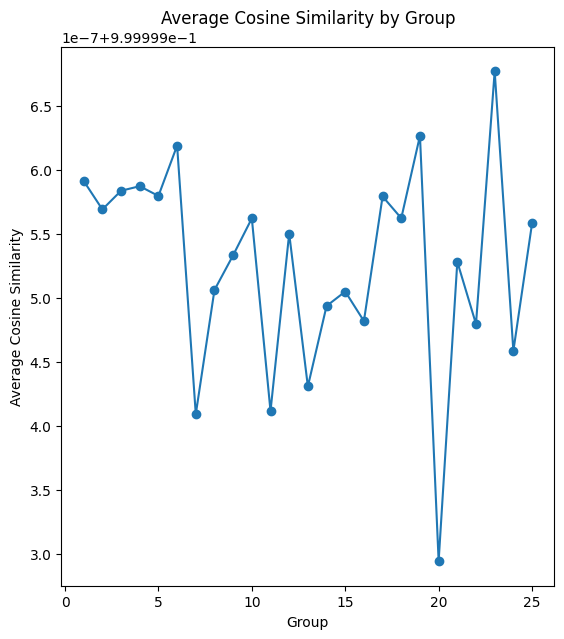

In [174]:
# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot Average Cosine Similarity
plt.subplot(1, 2, 1)
plt.plot(metrics_df['Group'], metrics_df['Average Cosine Similarity'], marker='o')
plt.title('Average Cosine Similarity by Group')
plt.xlabel('Group')
plt.ylabel('Average Cosine Similarity')


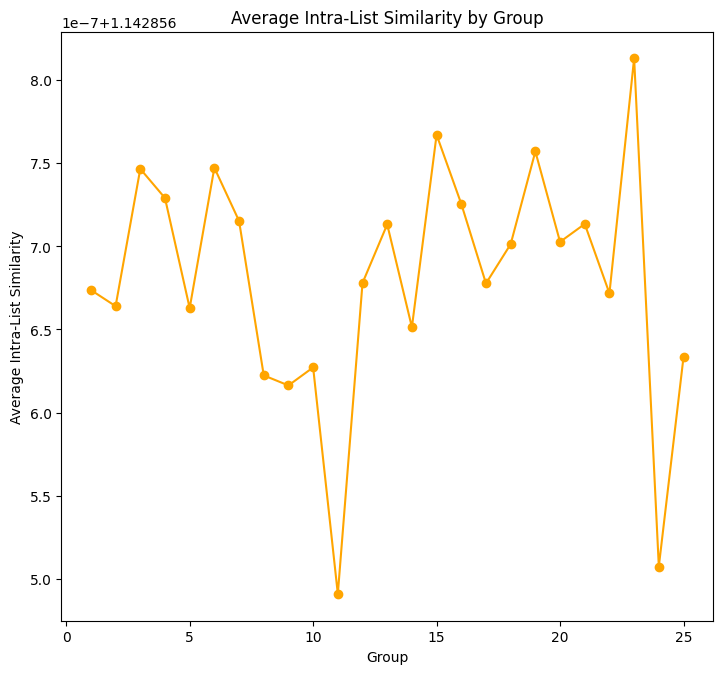

In [177]:
# Plot Average Intra-List Similarity
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 2)
plt.plot(metrics_df['Group'], metrics_df['Average Intra-List Similarity'], marker='o', color='orange')
plt.title('Average Intra-List Similarity by Group')
plt.xlabel('Group')
plt.ylabel('Average Intra-List Similarity')

plt.tight_layout()


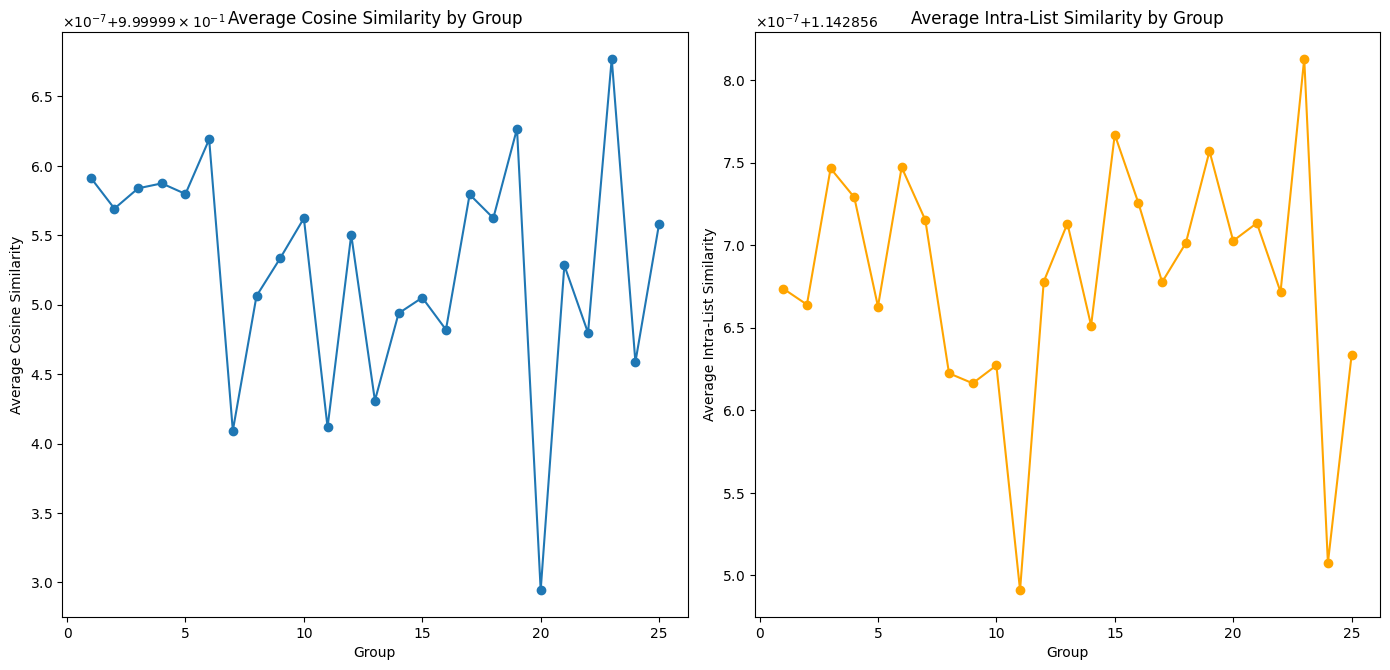

In [190]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plotting the results with adjusted y-axis labels
plt.figure(figsize=(14, 7))

# Plot Average Cosine Similarity
plt.subplot(1, 2, 1)
plt.plot(metrics_df['Group'], metrics_df['Average Cosine Similarity'], marker='o')
plt.title('Average Cosine Similarity by Group')
plt.xlabel('Group')
plt.ylabel('Average Cosine Similarity')

# Customize y-axis
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_minor_formatter(ticker.NullFormatter())

# Plot Average Intra-List Similarity
plt.subplot(1, 2, 2)
plt.plot(metrics_df['Group'], metrics_df['Average Intra-List Similarity'], marker='o', color='orange')
plt.title('Average Intra-List Similarity by Group')
plt.xlabel('Group')
plt.ylabel('Average Intra-List Similarity')

# Customize y-axis
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_minor_formatter(ticker.NullFormatter())

plt.tight_layout()
plt.savefig('metrics-with-outliers.png')
plt.show()
